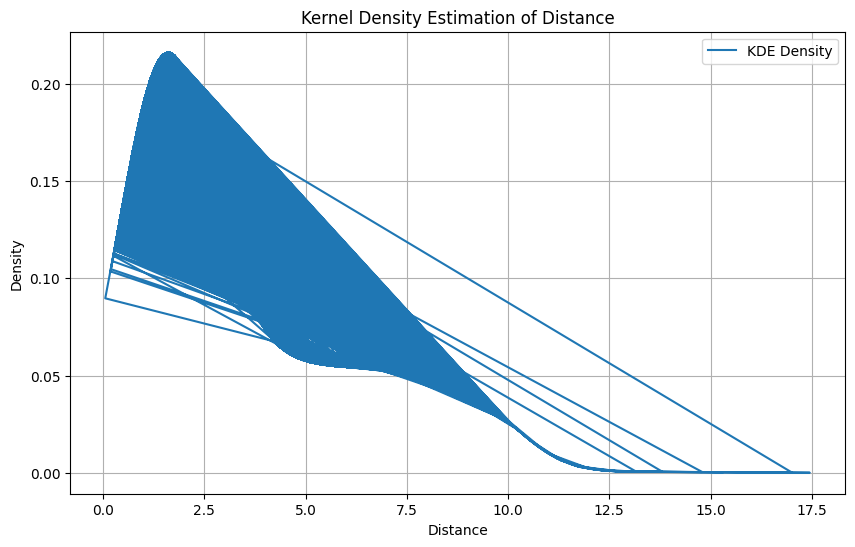

The distance threshold obtained by the KDE method is：1.8607794065928394


In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

# Assuming the dataset has already been loaded and the Distance column calculated
data = pd.read_excel('/Users/yangfanzhou/Desktop/1.8/Cluster_Data_Wholedistance_withposition(cleaned).xlsx')  # Please replace with your actual file path
# Calculate distance
data['Distance'] = np.sqrt(data['Positionx']**2 + data['Positiony']**2)

# Perform Kernel Density Estimation on the Distance column
distance_data = data['Distance'].values[:, np.newaxis]

# Use Kernel Density Estimation
kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(distance_data)
log_density = kde.score_samples(distance_data)

# Convert log density to density
density = np.exp(log_density)

# Plot the KDE result and distance data
plt.figure(figsize=(10, 6))
plt.plot(data['Distance'], density, label='KDE Density')
plt.xlabel('Distance')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Distance')
plt.legend()
plt.grid(True)
plt.show()

# Find the point where density drops significantly, used as a potential threshold
threshold_distance_kde = data['Distance'][np.argmax(np.diff(density) < 0)]

print(f"The distance threshold obtained by the KDE method is: {threshold_distance_kde}")


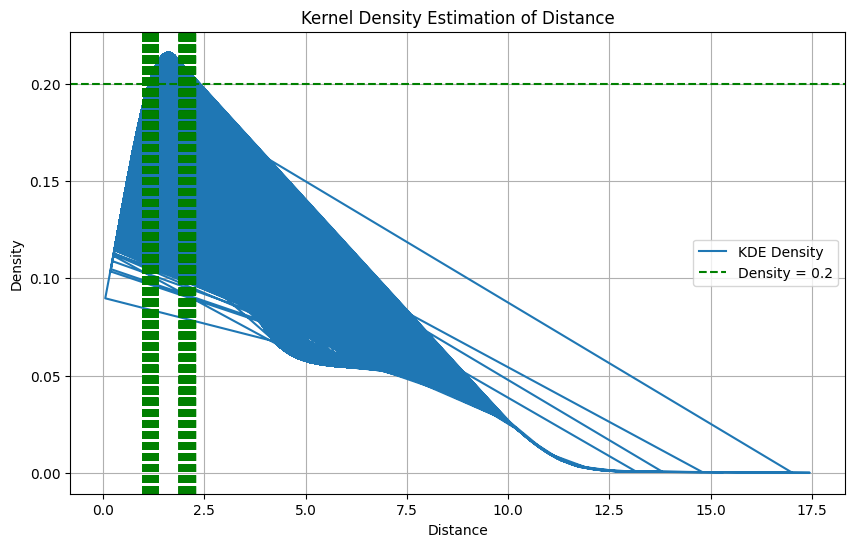

Distances corresponding to density = 0.2: [2.0976653689280376, 1.9315537786973471, 2.1594675269612185, 2.1964744478368057, 2.1964744478368057, 2.1964744478368057, 2.1964744478368057, 2.2276669409945464, 2.1964744478368057, 2.1964744478368057, 2.201181500921721, 2.201181500921721, 2.0670752284326763, 2.1110187114282053, 2.1110187114282053, 2.1110187114282053, 2.1110187114282053, 2.1110187114282053, 2.2226560687609767, 2.204835594777987, 2.0615528128088303, 2.056258738583255, 1.9342440383777846, 1.295414991421668, 2.074825293850063, 2.041886382735337, 1.9788127753782063, 1.9642046736529266, 1.9231484602078956, 1.3104197800704933, 1.2404031602668546, 1.2308127396155761, 1.181397477566293, 1.145600279329575, 1.1072488428533127, 1.109819805193618, 1.0171037311896953, 2.118962010041709, 2.1411212016137715, 2.008979840615629, 1.919192538543228, 1.919192538543228, 1.9702284131541703, 2.0012246250733576, 2.0012246250733576, 1.9233824372703419, 1.2727922061357855, 1.2495199078045935, 1.249519907

In [11]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

# Load dataset and calculate the Distance column
file_path = '/Users/yangfanzhou/Desktop/1.8/Cluster_Data_Wholedistance_withposition(cleaned).xlsx'  # Please replace with your actual file path
data = pd.read_excel(file_path)

# Calculate distance
data['Distance'] = np.sqrt(data['Positionx']**2 + data['Positiony']**2)

# Perform Kernel Density Estimation on the Distance column
distance_data = data['Distance'].values[:, np.newaxis]

# Use Kernel Density Estimation
kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(distance_data)
log_density = kde.score_samples(distance_data)

# Convert log density to density
density = np.exp(log_density)

# Target density value
target_density = 0.2

# Find the indices closest to the target density value
closest_indices = np.where(np.isclose(density, target_density, atol=0.01))[0]

# Get the corresponding distance values
corresponding_distances = data['Distance'].iloc[closest_indices]

# Plot the KDE result and distance data
plt.figure(figsize=(10, 6))
plt.plot(data['Distance'], density, label='KDE Density')
plt.axhline(target_density, color='green', linestyle='--', label=f'Density = {target_density}')
for d in corresponding_distances:
    plt.axvline(d, color='green', linestyle='--', alpha=0.7)
plt.xlabel('Distance')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Distance')
plt.legend()
plt.grid(True)
plt.show()

# Output the result
print(f"Distances corresponding to density = {target_density}: {corresponding_distances.tolist()}")


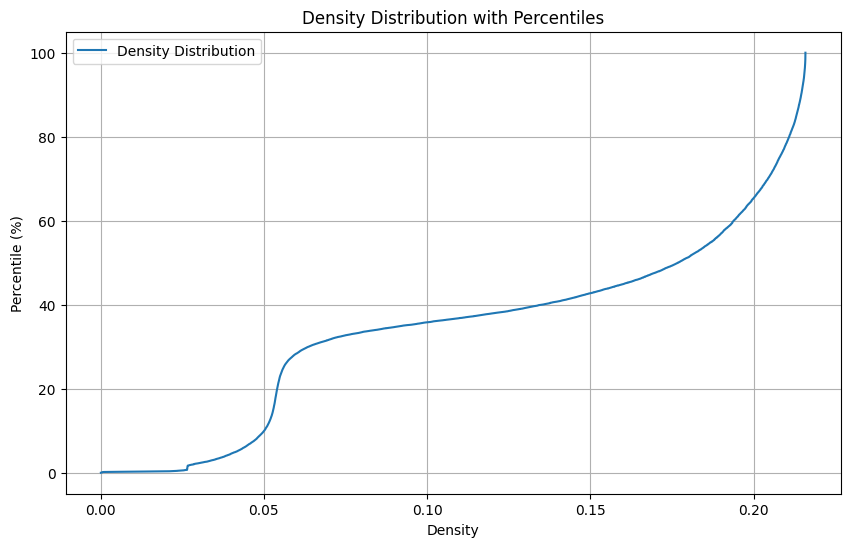

In [12]:
import pandas as pd
import np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

# Load dataset and calculate the Distance column
file_path = '/Users/yangfanzhou/Desktop/1.8/Cluster_Data_Wholedistance_withposition(cleaned).xlsx'  # Please replace with your actual file path
data = pd.read_excel(file_path)

# Calculate distance
data['Distance'] = np.sqrt(data['Positionx']**2 + data['Positiony']**2)

# Perform Kernel Density Estimation on the Distance column
distance_data = data['Distance'].values[:, np.newaxis]

# Use Kernel Density Estimation
kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(distance_data)
log_density = kde.score_samples(distance_data)

# Convert log density to density
density = np.exp(log_density)

# Calculate the percentiles corresponding to the density distribution
density_sorted = np.sort(density)
percentiles = np.linspace(0, 100, len(density_sorted))

# Plot the density distribution with percentiles
plt.figure(figsize=(10, 6))
plt.plot(density_sorted, percentiles, label='Density Distribution')
plt.xlabel('Density')
plt.ylabel('Percentile (%)')
plt.title('Density Distribution with Percentiles')
plt.grid(True)
plt.legend()
plt.show()
